In [1]:
## Digits

In [2]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Linear, Relu, Sigmoid, Softmax, Tanh
from gympy.networks import NeuralNetwork, DataSet
from gympy.optimizers import Adam
from gympy.loss import CategoricalCrossEntropy, Accuracy
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
digits = load_digits()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
X_train.shape

(1347, 64)

In [5]:
Y = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1,1)).T
Y.shape

(10, 1347)

In [6]:
X = StandardScaler().fit_transform(X_train).T
print(X.shape)


(64, 1347)


In [7]:

n_iter=390
model = NeuralNetwork(
    layers = [
        Tanh(n_input=64, n_output=32, dropout_rate=0.0),
        Softmax(n_input=32, n_output=10)
    ],
    optimizer = Adam(learning_rate=0.02, beta1=0.8, beta2=0.88),
    loss = CategoricalCrossEntropy(),
    n_iter=n_iter
)

In [8]:
tt = model.forward(X[:,0:1])
tt

array([[0.09895999],
       [0.10056421],
       [0.10089833],
       [0.09858502],
       [0.1010933 ],
       [0.0973907 ],
       [0.10043476],
       [0.10192469],
       [0.10067448],
       [0.09947451]])

In [9]:
yy = Y[:,0:1]
yy

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [10]:
np.log(0.5)

-0.6931471805599453

In [11]:
CategoricalCrossEntropy().forward(tt, Y[:,0:1])

2.296958806560079

In [12]:

dataset = DataSet(
    x = X,
    y = Y,
    batch_size=64
)


In [13]:
for i in model.get_bias():
    print(i.shape)

(32, 1)
(10, 1)


<class 'gympy.optimizers.optimizers.Adam'>
0 cost 0.4997025989116403 iter 22
10 cost 0.0014148192319629973 iter 232
20 cost 1.2421107994827306e-05 iter 442
30 cost 5.337180471574725e-07 iter 652
40 cost 1.96106615740981e-08 iter 862


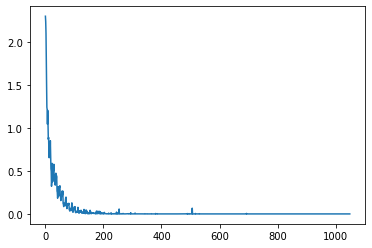

In [14]:
n_iter=5000
model.train_dataset(dataset, show=10, n_epochs=50)
plt.plot(model.cost)

In [15]:
model.forward(X[:,[453]])

array([[7.24476114e-16],
       [9.99999995e-01],
       [1.51550894e-19],
       [4.65706515e-09],
       [2.69809779e-13],
       [9.46005787e-16],
       [1.15942425e-18],
       [1.35686651e-12],
       [6.25256203e-14],
       [1.78842700e-11]])

In [16]:
test_idx = np.random.choice(X.shape[1],16, replace=False)

In [17]:
prob = model.forward(X[:,test_idx])
pred = np.argmax(prob,axis=0)

true_vals = np.argmax(Y[:,test_idx], axis=0)

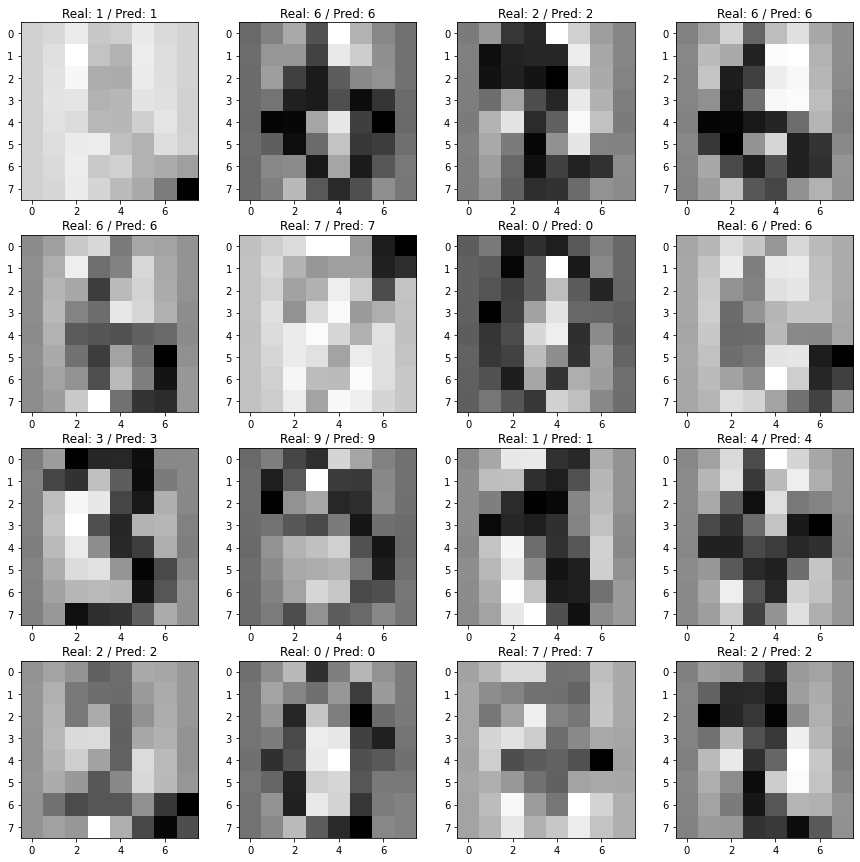

In [18]:
fig, axes = plt.subplots(4,4, figsize=(15,15))

for i,(idx, ax) in enumerate(zip(test_idx, axes.flatten())):
    ax.imshow(X[:,idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Real: {true_vals[i]} / Pred: {pred[i]}')

In [19]:
prob_total = model.forward(X)
pred_total = np.argmax(prob_total,axis=0)
true_vals_total = np.argmax(Y, axis=0)

acc = Accuracy()
acc.forward(prob_total, Y)

1.0